### ***Created by Mir Mikael***
### ***For quastions: [MirMikael.github.io](https://MirMikael.github.io)***

### ***Connect to Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Functions and Librarys***

In [5]:
from tensorflow.keras.layers import Input, Dropout, LSTM, GRU, Dense
from tensorflow.keras.layers import Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import scipy.io as io
import pandas as pd
import random

# ***Load *.mat Data***

In [6]:
path='/content/drive/My Drive/'
dataCSV_not3 = pd.read_csv(path + "dataCSV_125.csv")

# ***Data Reshape & Shuffle Function***

In [7]:
raw_data = dataCSV_not3

data = raw_data.values
print('data=',data.shape)

train_X = data
train_y = np.array([[0]]*(210*8) + [[1]]*(210*8) + [[2]]*(210*8) + [[3]]*(210*8) + [[4]]*(210*8))

print('train_y=',train_y.shape)


data= (8400, 1250)
train_y= (8400, 1)


In [10]:
scaler = StandardScaler()
x = scaler.fit(train_X)
x = scaler.transform(train_X)

y = to_categorical(train_y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 98)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))
x_val= np.reshape(x_val, (x_val.shape[0],1,x.shape[1]))

print('x_test=',x_train.shape)
print('x_test=',x_test.shape)
print('x_val=',x_val.shape)
print('y_test=',y_train.shape)
print('y_test=',y_test.shape)
print('y_val=',y_val.shape)

x_test= (7140, 1, 1250)
x_test= (630, 1, 1250)
x_val= (630, 1, 1250)
y_test= (7140, 5)
y_test= (630, 5)
y_val= (630, 5)


# ***Plot Function***

In [11]:

def plot_history(network_history):
    history = network_history.history
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.plot(losses, color='blue', label='Training Loss')
    plt.plot(val_losses, color='orange', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


    plt.figure(figsize=(10, 5))
    plt.plot(accuracies, color='green', label='Training Accuracy')
    plt.plot(val_accuracies, color='red', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

# ***Creating and Training model***

*Creating Bidirectional LSTM*

In [22]:
tf.keras.backend.clear_session()

def CreateBiLSTMModel():
    model = Sequential()
    model.add(Bidirectional(LSTM(130, input_shape=(x_train.shape[0],1,x.shape[1]), activation="relu", return_sequences=True, dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(174, activation="relu", return_sequences=True, dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(303, activation="sigmoid", dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Dense(5,activation='softmax'))

    optimizer = SGD(lr=2e-5)
    # optimizer = Adam(lr=2e-5)
    # optimizer = keras.optimizers.RMSprop(lr=0.009, rho=0.9, epsilon=1e-08)

    model.compile(loss ='mse', optimizer = optimizer, metrics = ['accuracy'])

    return model


*Creating Bidirectional GRU*

In [21]:
tf.keras.backend.clear_session()

def CreateBiGRUModel():
    model = Sequential()
    model.add(Bidirectional(GRU(130, input_shape=(x_train.shape[0],1,x.shape[1]), activation="relu", return_sequences=True, dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Bidirectional(GRU(174, activation="relu", return_sequences=True, dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Bidirectional(GRU(303, activation="sigmoid", dropout=0.1)))
    model.add(BatchNormalization())
    model.add(Dense(5,activation='softmax'))

    optimizer = SGD(lr=2e-5)
    # optimizer = Adam(lr=2e-5)
    # optimizer = keras.optimizers.RMSprop(lr=0.009, rho=0.9, epsilon=1e-08)

    model.compile(loss ='mse', optimizer = optimizer, metrics = ['accuracy'])

    return model


*Model Training*

Epoch 1/10
224/224 [==============================] - 22s 48ms/step - loss: 0.1909 - accuracy: 0.2238 - val_loss: 0.1596 - val_accuracy: 0.2238
Epoch 2/10
224/224 [==============================] - 8s 35ms/step - loss: 0.1794 - accuracy: 0.2527 - val_loss: 0.1606 - val_accuracy: 0.3000
Epoch 3/10
224/224 [==============================] - 10s 43ms/step - loss: 0.1696 - accuracy: 0.2926 - val_loss: 0.1582 - val_accuracy: 0.3397
Epoch 4/10
224/224 [==============================] - 9s 41ms/step - loss: 0.1610 - accuracy: 0.3232 - val_loss: 0.1531 - val_accuracy: 0.3571
Epoch 5/10
224/224 [==============================] - 8s 37ms/step - loss: 0.1548 - accuracy: 0.3578 - val_loss: 0.1480 - val_accuracy: 0.3968
Epoch 6/10
224/224 [==============================] - 10s 43ms/step - loss: 0.1483 - accuracy: 0.3850 - val_loss: 0.1431 - val_accuracy: 0.4190
Epoch 7/10
224/224 [==============================] - 8s 36ms/step - loss: 0.1424 - accuracy: 0.4207 - val_loss: 0.1393 - val_accuracy: 0.4

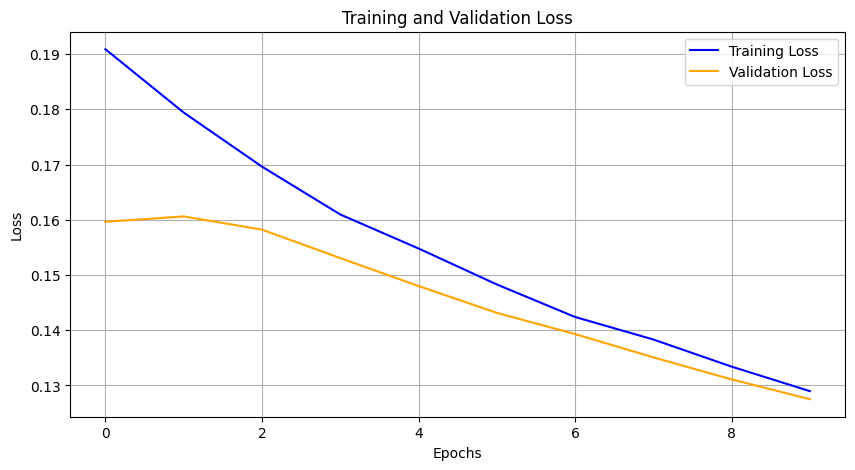

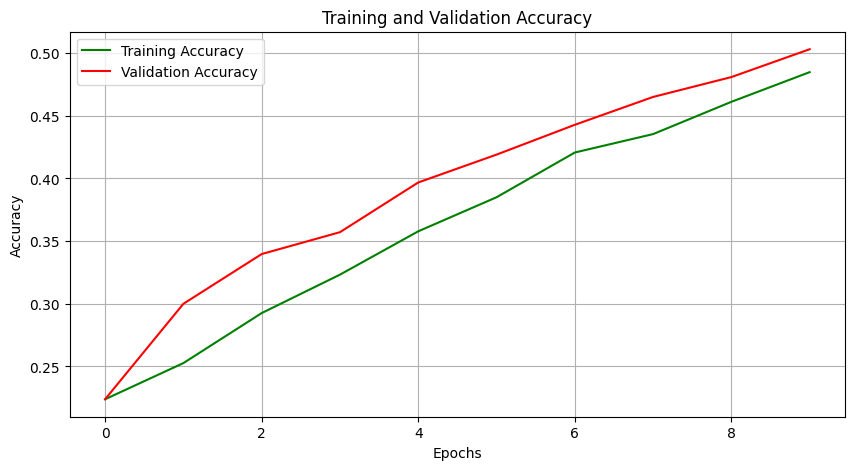

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 260)            1077960   
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 1, 260)            1040      
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 348)            455184    
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 1, 348)            1392      
 chNormalization)                                                
                                                                 
 bidirectional_2 (Bidirecti  (None, 606)               1

In [23]:
model = CreateBiGRUModel()

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
# checkpoint_filepath = '/content/drive/My Drive/nwemodel.h5'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                                 filepath=checkpoint_filepath,
#                                 monitor='val_accuracy',
#                                 mode='max',
#                                 save_best_only=True)

network_history = model.fit(x=x_train,
                            y=y_train,
                            epochs=10,
                            validation_data= (x_val, y_val))#,callbacks=[model_checkpoint_callback])

plot_history(network_history)
model.summary()

# ***Mode Testing***

In [25]:
test_loss, test_acc = model.evaluate(x_test,y_test)

20/20 [==============================] - 0s 11ms/step - loss: 0.1263 - accuracy: 0.5127
